In [1]:
import isx  # to work with API
import numpy as np  # to manipulate matrix
import numpy.matlib  # to manipulate matrix
import pandas as pd  # data analysis library
import matplotlib.pyplot as plt  # data visualization
import matplotlib # for coloring cells differently
from matplotlib.pyplot import cm # for coloring cells differently

from scipy import stats  # calculate zscore
import os  # operating system
from pathlib import Path  # to work with dir
import tifffile as tiff  # to read tiff files
import shutil  # to move files

import math
from scipy import signal
import skimage

import warnings
# to suppress warnings from the output window
warnings.filterwarnings("ignore")
# to render the figures inside the current notebook
%matplotlib inline

Accelerometer Data Transformation

In [2]:
## FINAL CODE ##

#csv_data = pd.read_csv('2023-02-01-16-54-21_video_imu.csv', usecols = [0,1,2,3])
csv_data = pd.read_csv('2022-03-04-13-12-15_video_imu.csv', usecols = [0,1,2,3])
raw_acceleration = csv_data.iloc[:, 1:4]
time = csv_data.iloc[:,0]

x_axis = raw_acceleration.iloc[:,0]
y_axis = raw_acceleration.iloc[:,1]
z_axis = raw_acceleration.iloc[:,2]

BA = np.sqrt(x_axis**2 + y_axis**2 + z_axis**2)
fs = 1 / np.mean(np.diff(csv_data.iloc[:, 0]))
sos = signal.butter(N=3, Wn=5, btype='highpass', output='sos', fs=fs)
filtered_BA = signal.sosfilt(sos, BA)
thresh = skimage.filters.threshold_otsu(image=filtered_BA)
movements = filtered_BA > thresh

Data Visualization

In [3]:
#frames = list(range(len(time)))  ## optional to use frames as x axis ##

In [4]:
movements_binary = movements.astype('uint8')

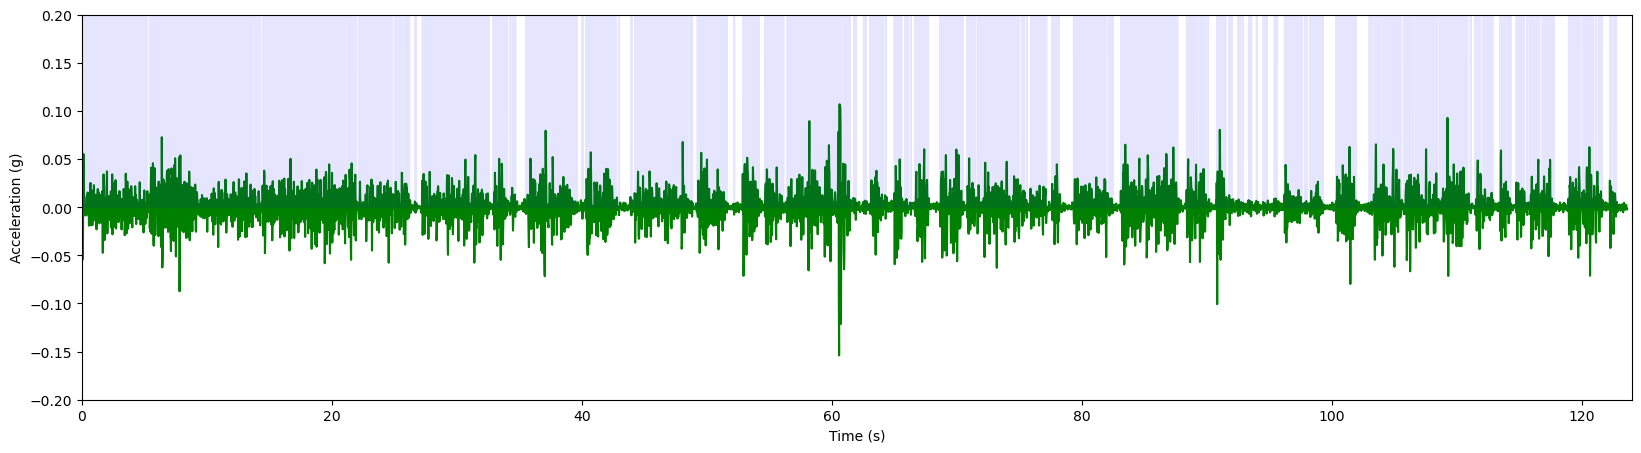

In [5]:
plt.figure(figsize=(20,5))
plt.plot(time,filtered_BA, 'g')
plt.plot(time,movements_binary, color = 'b', alpha=0.1)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
plt.xlim(0,124)
#plt.ylim(-0, 0.2)
plt.ylim(-0.2, 0.2)
plt.show()